# Линейная регрессия. Работа с признаками

## Описание задачи и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/diamonds.csv', index_col=0)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Посмотрим на типы столбцов.

In [3]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

### Задание 1

Есть ли в наборе данных пропущенные значения? Если да, удалите их.

Также выведите на экран число пропусков в каждом столбце.

In [4]:
data.isna().mean()

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

### Задание 2

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками.  
Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какой вещественный признак коррелирует с целевой переменной больше всего?

In [5]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


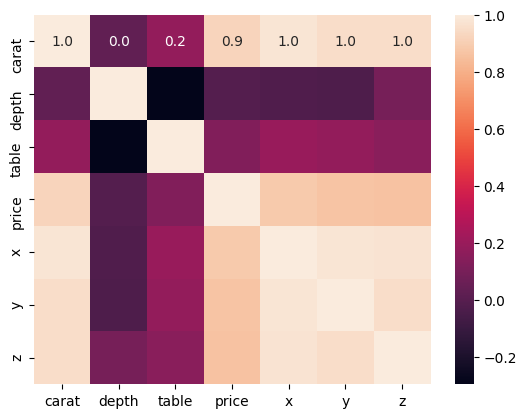

In [6]:
sns.heatmap(data.corr(), annot=True, fmt=".1f");

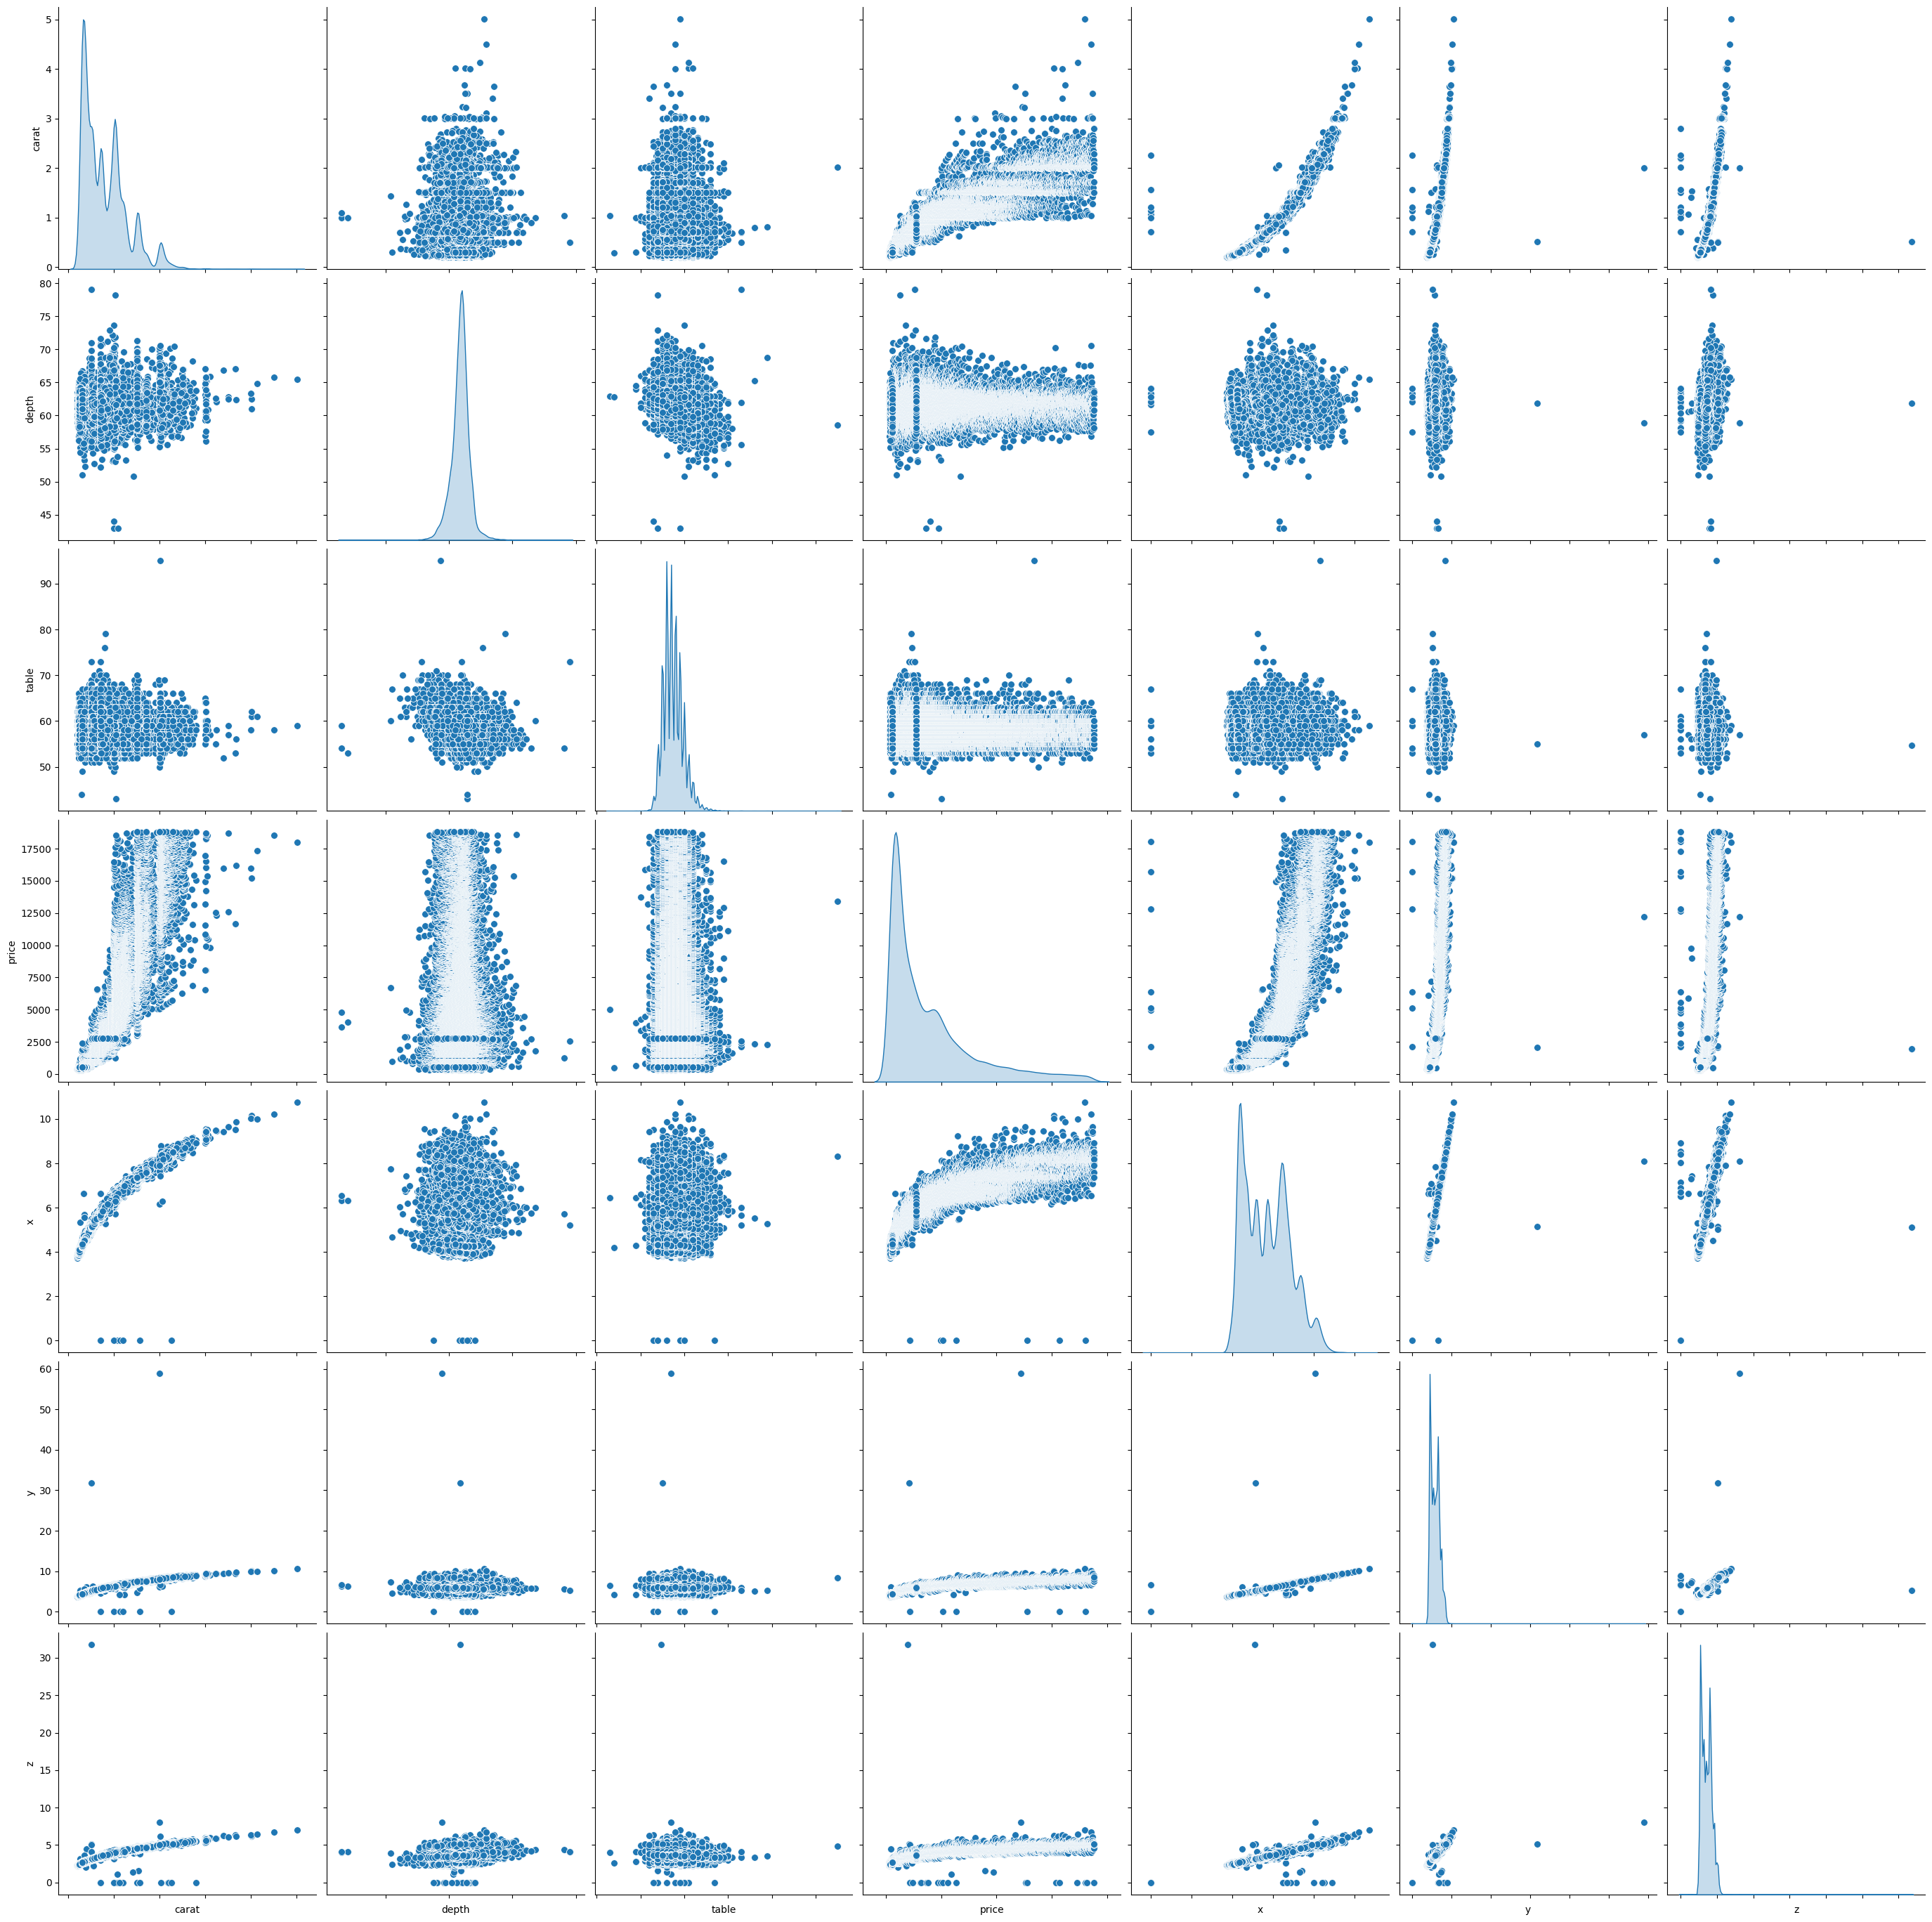

In [7]:
g = sns.pairplot(
    data,
    palette = 'seismic',
    height=4,
    diag_kind = 'kde',
    diag_kws=dict(fill=True),
    plot_kws=dict(s=50)
    )

g.set(xticklabels=[]);

### Задание 3

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Не забудьте поставить значение параметра `drop_first` равным `True`.

Сколько получилось столбцов в таблице `data`?

*P.S. Числовые столбцы оставляем в таблице без изменений.*

In [8]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [10]:
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [11]:
data['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [12]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
# должно выйти 17 колонок (уже с дропом) + 7 числовых

In [13]:
new_data = pd.concat([pd.get_dummies(data[['cut', 'color', 'clarity']], drop_first=True), 
                     data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]],
                     axis=1)
new_data.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,...,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,price,x,y,z
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0.23,61.5,55.0,326,3.95,3.98,2.43
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0.21,59.8,61.0,326,3.89,3.84,2.31
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.23,56.9,65.0,327,4.05,4.07,2.31
4,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0.29,62.4,58.0,334,4.20,4.23,2.63
5,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0.31,63.3,58.0,335,4.34,4.35,2.75


### Задание 4

Создайте матрицу `X`, содержащую все признаки, и не содержащую целевую переменную `price`. Также создайте вектор `y`, содержащий целевую переменную `price`.

In [14]:
X, y = new_data.drop(['price'], axis=1), new_data['price']

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной `0.3`.

При разбиении укажите `random_state = 42`.

In [15]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.3)

### Задание 5

Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

*  Обучите (`fit`) scaler на тренировочных данных
*  Преобразуйте (`transform`) и трейн, и тест

После применения масштабирования матрица перестает быть объектом `pandas.DataFrame` - решите эту проблему.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xtrain)

StandardScaler()

In [18]:
Xtrain_sc, Xtest_sc = scaler.transform(Xtrain), scaler.transform(Xtest)

#### При стандартизации важно обучиться именно на трейне, потому что обучениие на полных данных даст data leak.
Почему стандартизатор должен быть один и только на трейне: изначально у нас есть какое-то предполагаемое распределение генеральной совокупности. Мы также предполагаем, что тренировочные данные эту гс отражают. Обучая стандартизатор на train части, мы выучимся стандартизовывать предполагаемое распределение. Далее, применяя стандртизатор к тесту, мы стандартизируем новые данные полагая, что они из того же множества, что и train. 

Если обучать свой стандартизатор для каждого нового тест кусочка, что преобразования не будут соответствовать изначальным допущениям. 

In [19]:
Xtrain_sc_df, Xtest_sc_df  = pd.DataFrame(Xtrain_sc), pd.DataFrame(Xtest_sc)

### Задание 6

Обучите линейную регрессию на тренировочной выборке. Выведите *r2-score* на тренировочной и тестовой выборках.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(Xtrain_sc_df, ytrain)

LinearRegression()

In [45]:
# на тренировочных данных
model.score(Xtrain_sc_df, ytrain)

0.9195976267987521

In [21]:
pred = model.predict(Xtest_sc)

In [22]:
# на тестовых данных
r2_score(ytest, pred)

0.9201866914388087

In [23]:
model.score(Xtest_sc_df, ytest)

0.9201866914388087

### Задание 7

Выведите на экран веса, которые линейная регрессия присвоила признакам.

Какой признак имеет наибольший отрицательный вес? (наибольший по модулю среди всех отрицательных весов)

In [24]:
model.coef_

array([  170.60293265,   414.36951486,   339.23920411,   310.65425625,
         -83.64002086,  -104.56099268,  -202.86356354,  -362.00229958,
        -442.78356742,  -529.44921589,   975.93364117,  1611.5716809 ,
        1042.92121499,  1670.31849636,  1817.66420828,  1284.80947523,
        1461.03419387,  5338.61567061,   -90.17381703,   -60.33227991,
       -1100.41885004,    -6.45891672,   -34.25894462])

In [25]:
for column, beta in zip(X.columns, model.coef_):
    print(f'{column}: {beta}')

print(f'b0 = {model.intercept_}')

cut_Good: 170.60293264999754
cut_Ideal: 414.36951485901216
cut_Premium: 339.23920410857795
cut_Very Good: 310.654256253606
color_E: -83.64002086129292
color_F: -104.56099268431062
color_G: -202.86356354325423
color_H: -362.00229957713
color_I: -442.7835674246337
color_J: -529.4492158873965
clarity_IF: 975.9336411743096
clarity_SI1: 1611.571680904242
clarity_SI2: 1042.921214991583
clarity_VS1: 1670.3184963597841
clarity_VS2: 1817.664208277245
clarity_VVS1: 1284.8094752321983
clarity_VVS2: 1461.0341938720865
carat: 5338.6156706147885
depth: -90.17381703342281
table: -60.332279910274934
x: -1100.418850039302
y: -6.458916720532912
z: -34.25894462088211
b0 = 3951.4953122517086


## Попытка улучшить качество модели

Данная часть является творческой, и задания в ней немного сложнее, чем предыдущие.

Следующие вопросы не проверяются тестами.

### Задание 8

Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц `Xtrain` и `Xtest` признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?

Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

### 8.1 Для начала я бы удалили размеры бриллианта, тк они коррелируют с признаком карат и коррелирют друг с другом

In [38]:
data_xyz = new_data.drop(['x', 'y', 'z'], axis=1)

In [39]:
X, y = data_xyz.drop(['price'], axis=1), data_xyz['price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [48]:
# обучаем стандартизатор
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [53]:
# стандартизируем и переводим в dataframe
X_train_sc, X_test_sc = scaler.transform(X_train), scaler.transform(X_test)
X_train_sc, X_test_sc  = pd.DataFrame(X_train_sc), pd.DataFrame(X_test_sc)

In [54]:
# обучаем
model_2 = LinearRegression()
model_2.fit(X_train_sc, y_train)

LinearRegression()

In [55]:
# получаем предикты
pred_2 = model_2.predict(X_test_sc)

In [57]:
# r^2 на тренировочных данных
model_2.score(X_train_sc, y_train)

0.9159704730530022

In [58]:
# r^2 на тестовых данных
model_2.score(X_test_sc, y_test)

0.916194716704243

#### модель стала чуть хуже, но стала легче, посмотрим на коэффициенты

In [59]:
for column, beta in zip(X.columns, model_2.coef_):
    print(f'{column}: {beta}')

print(f'b0 = {model_2.intercept_}')

cut_Good: 178.49223368819221
cut_Ideal: 431.38551957562834
cut_Premium: 355.3439146195319
cut_Very Good: 328.65736943007204
color_E: -84.37102234658835
color_F: -117.29122861488301
color_G: -213.02977382782552
color_H: -359.7198398484216
color_I: -434.4631674686369
color_J: -519.441073137963
clarity_IF: 984.9967581225651
clarity_SI1: 1567.518886149266
clarity_SI2: 1010.2336538574245
clarity_VS1: 1648.45799102899
clarity_VS2: 1790.6172168715964
clarity_VVS1: 1296.0422261052531
clarity_VVS2: 1460.9090040248852
carat: 4232.833962544071
depth: -29.60066365479142
table: -59.00748486473003
b0 = 3951.495312251708


### 8.2 пробую убрать караты и опробовать уникальные сочетания признаков размера

In [63]:
df_carat = new_data.drop('carat', axis=1)

In [65]:
X, y = df_carat.drop('price', axis=1), df_carat['price']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [68]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [72]:
X_trainsc, X_testsc = scaler.transform(X_train), scaler.transform(X_test)
X_trainsc, X_testsc = pd.DataFrame(X_trainsc), pd.DataFrame(X_testsc)

In [75]:
model_3 = LinearRegression()
model_3.fit(X_trainsc, y_train)

LinearRegression()

In [78]:
pred_3 = model_3.predict(X_testsc)

In [79]:
model_3.score(X_trainsc, y_train)

0.8401690117841832

In [81]:
model_3.score(X_testsc, y_test)

0.8396814679276638

#### Доля объясняемой дисперсии стала ниже, значит караты важный признак (об этом было понятно еще по весу в 1 модели). Добавим полиномиальные признаки

### Задание 9

Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель.  

Помогло ли это улучшить качество модели?
#### Добавим квадраты

In [87]:
X, y = new_data.drop(['price'], axis=1), new_data['price']

In [88]:
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X, y, train_size=0.7, random_state=42)

In [89]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

# добавляем признаки
pf.fit(X_train_9)

X_train_new_9 = pf.transform(X_train_9)
X_test_new_9 = pf.transform(X_test_9)

In [93]:
pd.DataFrame(X_train_new_9)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3249.0,394.44,391.59,241.11,47.8864,47.5404,29.2716,47.1969,29.0601,17.8929
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3136.0,245.28,244.16,151.76,19.1844,19.0968,11.8698,19.0096,11.8156,7.3441
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3249.0,384.75,389.31,241.68,45.5625,46.1025,28.6200,46.6489,28.9592,17.9776
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3025.0,325.60,327.80,204.60,35.0464,35.2832,22.0224,35.5216,22.1712,13.8384
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3136.0,332.64,333.20,205.52,35.2836,35.3430,21.7998,35.4025,21.8365,13.4689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3481.0,382.32,384.09,238.95,41.9904,42.1848,26.2440,42.3801,26.3655,16.4025
37754,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3025.0,276.65,275.55,168.30,25.3009,25.2003,15.3918,25.1001,15.3306,9.3636
37755,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3364.0,260.42,258.68,156.60,20.1601,20.0254,12.1230,19.8916,12.0420,7.2900
37756,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3481.0,361.67,355.77,225.38,37.5769,36.9639,23.4166,36.3609,23.0346,14.5924


In [94]:
scaler_9 = StandardScaler()
scaler_9.fit(X_train_new_9)

StandardScaler()

In [96]:
X_train_sc_9, X_test_sc_9 = scaler_9.transform(X_train_new_9), scaler_9.transform(X_test_new_9)

In [98]:
model_9 = LinearRegression()
model_9.fit(X_train_sc_9, y_train_9)

LinearRegression()

In [99]:
model_9.score(X_test_sc_9, y_test_9)

0.8871301693473341

In [100]:
model_9.score(X_train_sc_9, y_train_9)

0.971862380853747

Модель переобучилась, посмотрим коэффициенты для подтверждения

In [103]:
min(model_9.coef_)

-330936015390274.25

In [104]:
max(model_9.coef_)

330936015388707.06

Из-за полинома получилось слишком много признаков. Сделаем так: по скатерплоту видно, что зависимость между каратом и ценой напоминает ветвь параболы. Можно попробовать сгенерить квадрат карата + полиномы сделать не на всю таблицу, а на фичи без OHE. Затем стандартизировать и обучить